In [3]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from arch import arch_model

from var_es_toolbox.data import load_data

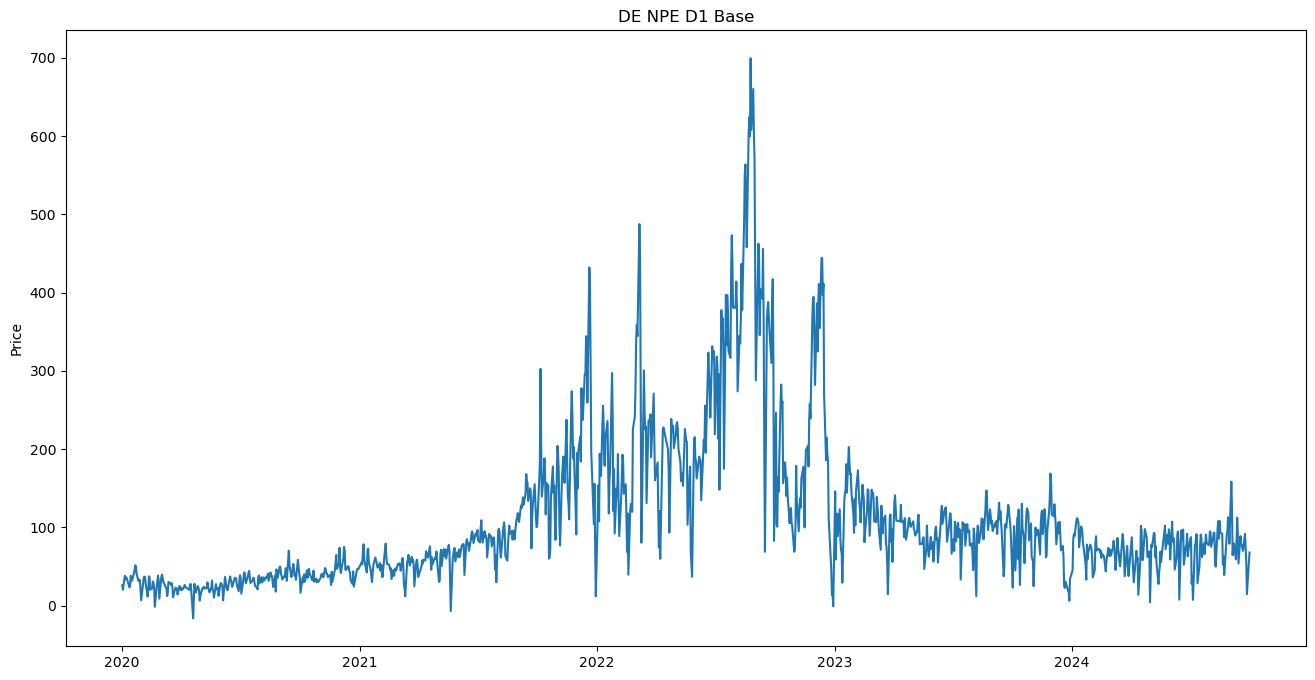

In [4]:
project_dir = Path.cwd().parent
data_dir = project_dir / "data"
data_futures_name = "DE_NPE_Daily_Base.csv"
data_fundamentals_name = "DE_Supply_and_Demand.csv"

date_format = "%d-%m-%y %H:%M"
future_n = 0

data_futures = load_data(data_dir / data_futures_name, date_format=date_format)
data_fundamentals = load_data(data_dir / data_fundamentals_name, date_format=date_format)

data = pd.merge(data_futures, data_fundamentals, left_index=True, right_index=True).dropna()

futures_name = data.columns[future_n]
futures_price = data[futures_name]

fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(futures_price)
ax.set(title="DE NPE D1 Base", ylabel="Price")
plt.show()

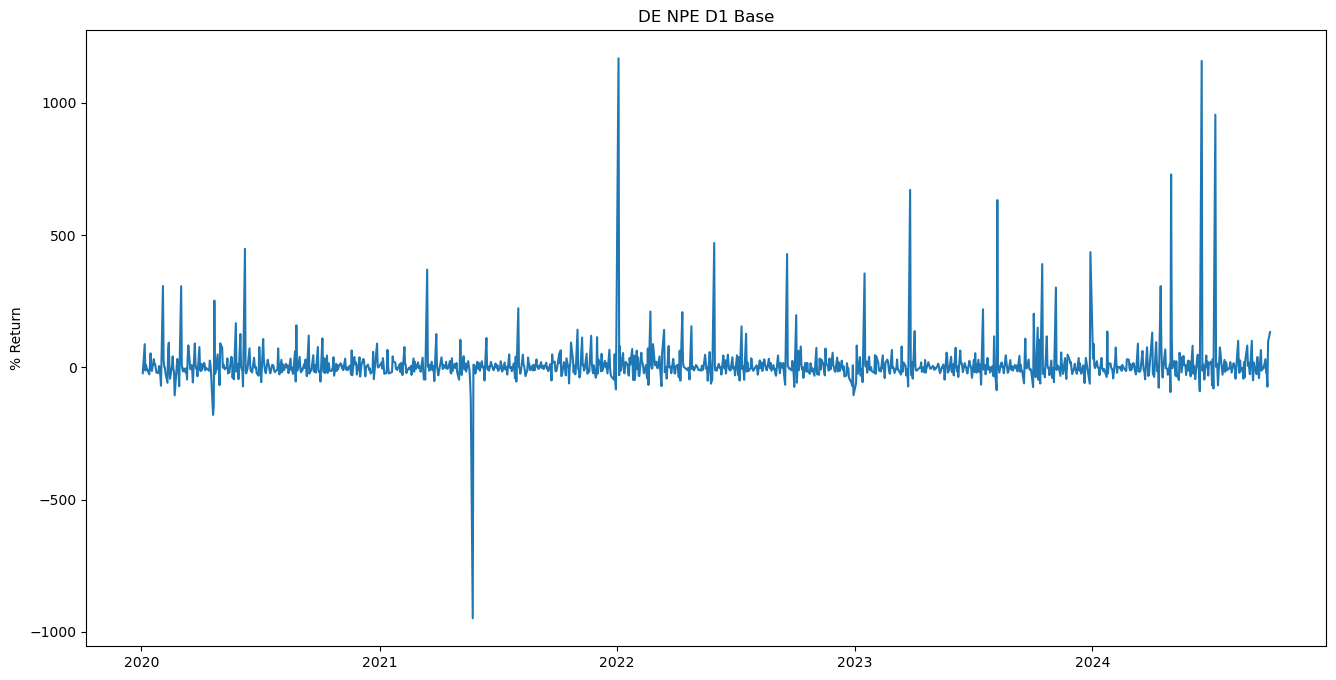

In [5]:
futures_return = futures_price.pct_change().dropna() * 100
futures_return = futures_return[futures_return >= -1000]

fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(futures_return)
ax.set(title="DE NPE D1 Base", ylabel="% Return")
plt.show()

In [6]:
daily_volatility = futures_return.std()
print(f"Daily volatility: {daily_volatility}%")

monthly_trade_days = 21
monthly_volatility = np.sqrt(monthly_trade_days) * daily_volatility
print(f"Monthly volatility: {monthly_volatility}%")

yearly_trade_days = 252
yearly_volatility = np.sqrt(yearly_trade_days) * daily_volatility
print(f"Yearly volatility: {yearly_volatility}%")

Daily volatility: 87.26463569692035%
Monthly volatility: 399.89679857388296%
Yearly volatility: 1385.2831458282053%


Iteration:      1,   Func. Count:      6,   Neg. LLF: 6754.518966887354
Iteration:      2,   Func. Count:     11,   Neg. LLF: 6754.173427159692
Iteration:      3,   Func. Count:     16,   Neg. LLF: 6754.058252699453
Iteration:      4,   Func. Count:     21,   Neg. LLF: 6754.053236559824
Iteration:      5,   Func. Count:     26,   Neg. LLF: 6754.02249630175
Iteration:      6,   Func. Count:     31,   Neg. LLF: 6753.865279297046
Iteration:      7,   Func. Count:     36,   Neg. LLF: 6753.071202092682
Iteration:      8,   Func. Count:     41,   Neg. LLF: 6749.070451216445
Iteration:      9,   Func. Count:     46,   Neg. LLF: 6728.371761850298
Iteration:     10,   Func. Count:     51,   Neg. LLF: 6605.647794458675
Iteration:     11,   Func. Count:     56,   Neg. LLF: 81167.94347972449
Iteration:     12,   Func. Count:     62,   Neg. LLF: 9587.408498204164
Iteration:     13,   Func. Count:     68,   Neg. LLF: 656756.6544959106
Iteration:     14,   Func. Count:     74,   Neg. LLF: 187829.1656

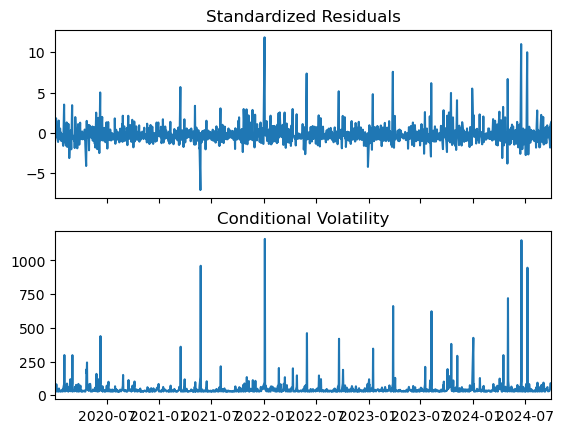

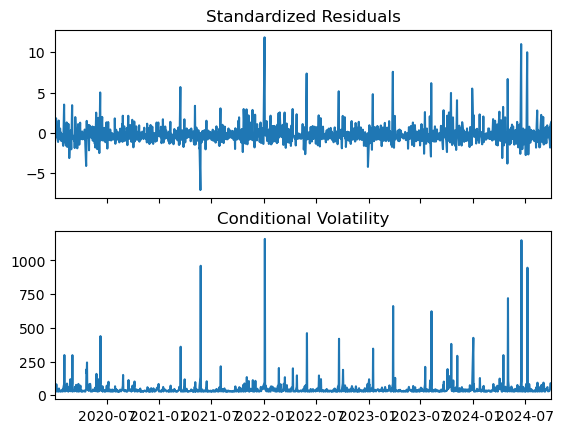

In [7]:
p = 1
q = 1
mean = "constant"
vol = "garch"
dist = "normal"

basic_gm = arch_model(futures_return, p=p, q=q, mean=mean, vol=vol, dist=dist)

gm_result = basic_gm.fit()
print(gm_result.summary())
gm_result.plot()

In [8]:
# Make 5-period ahead forecast
gm_forecast = gm_result.forecast(horizon = 5)

# Print the forecast variance
print(gm_forecast.variance[-1:])

                     h.1           h.2           h.3           h.4  \
Date                                                                 
2024-09-30  15880.633824  16631.165224  17381.696623  18132.228022   

                     h.5  
Date                      
2024-09-30  18882.759422  


[Text(0.5, 1.0, 'Distribution of Standardized Residuals')]

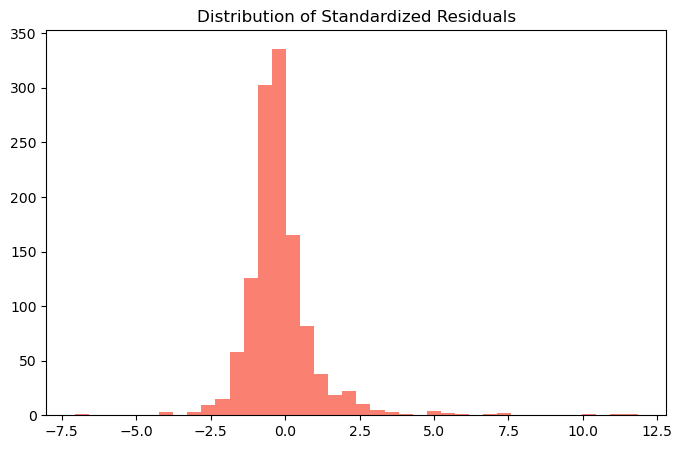

In [9]:
# Calculate standardized residual
gm_std_resid = gm_result.resid / gm_result.conditional_volatility

# Plot
fig, ax = plt.subplots(figsize=(8,5))
ax.hist(gm_std_resid, color='salmon', bins=40)
ax.set(title='Distribution of Standardized Residuals')

In [10]:
import os
import rpy2.situation as rsetup
os.environ["R_HOME"] = rsetup.get_r_home()
%load_ext rpy2.ipython
import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [11]:
pandas2ri.activate()
robjects.globalenv['df'] = pandas2ri.py2rpy(data)

In [12]:
%%R

library(rprojroot)
project_dir <- rprojroot::find_root(rprojroot::is_rstudio_project | rprojroot::has_file("renv.lock"))

renv::activate(project = project_dir)

* Project 'C:/Users/chris/PycharmProjects/var-es-toolbox' loaded. [renv 0.17.3]


In [ ]:
%%R

renv::install("ggplot2")

In [13]:
%%R

ggplot(df, aes(x=`Total electricity supply`, y=`Total electricity demand`)) +
    geom_point(color="blue") +
    ggtitle("Electricity Supply vs Demand") +
    xlab("Total electricity supply") +
    ylab("Total electricity demand")

R[write to console]: Error in ggplot(df, aes(x = `Total electricity supply`, y = `Total electricity demand`)) : 
  could not find function "ggplot"




Error in ggplot(df, aes(x = `Total electricity supply`, y = `Total electricity demand`)) : 
  could not find function "ggplot"


RInterpreterError: Failed to parse and evaluate line '\nggplot(df, aes(x=`Total electricity supply`, y=`Total electricity demand`)) +\n    geom_point(color="blue") +\n    ggtitle("Electricity Supply vs Demand") +\n    xlab("Total electricity supply") +\n    ylab("Total electricity demand")\n'.
R error message: 'Error in ggplot(df, aes(x = `Total electricity supply`, y = `Total electricity demand`)) : \n  could not find function "ggplot"'